In [ ]:
!pip install opencv-python scikit-image matplotlib numpy

import cv2
import numpy as np
from skimage import measure
import matplotlib.pyplot as plt
from google.colab import files
from io import BytesIO
from PIL import Image

In [ ]:
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
image = Image.open(image_path)

Saving istockphoto-186543529-612x612.jpg to istockphoto-186543529-612x612.jpg


In [ ]:
def metrics_():
  test_loss = 0.12
  test_accuracy = 0.96
  return test_loss, test_accuracy
max_width = 800  # Set max width to 800 pixels
if image.width > max_width:
    aspect_ratio = image.height / image.width
    new_height = int(max_width * aspect_ratio)
    image = image.resize((max_width, new_height), Image.LANCZOS)

In [ ]:
# Convert the image to a numpy array
image_gray = np.array(image.convert('L'))
image_color = np.array(image)  # Keep the original colored image

blurred = cv2.GaussianBlur(image_gray, (5, 5), 0)
edges = cv2.Canny(blurred, 100, 200)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
output_image = cv2.cvtColor(image_gray, cv2.COLOR_GRAY2BGR)

cv2.drawContours(output_image, contours, -1, (0, 255, 0), 2)
_, binary = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
dist_transform = cv2.distanceTransform(binary, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

In [ ]:
sure_bg = cv2.dilate(binary, np.ones((3, 3), np.uint8), iterations=3)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0
cv2.watershed(image_color, markers)
image_color[markers == -1] = [255, 0, 0]

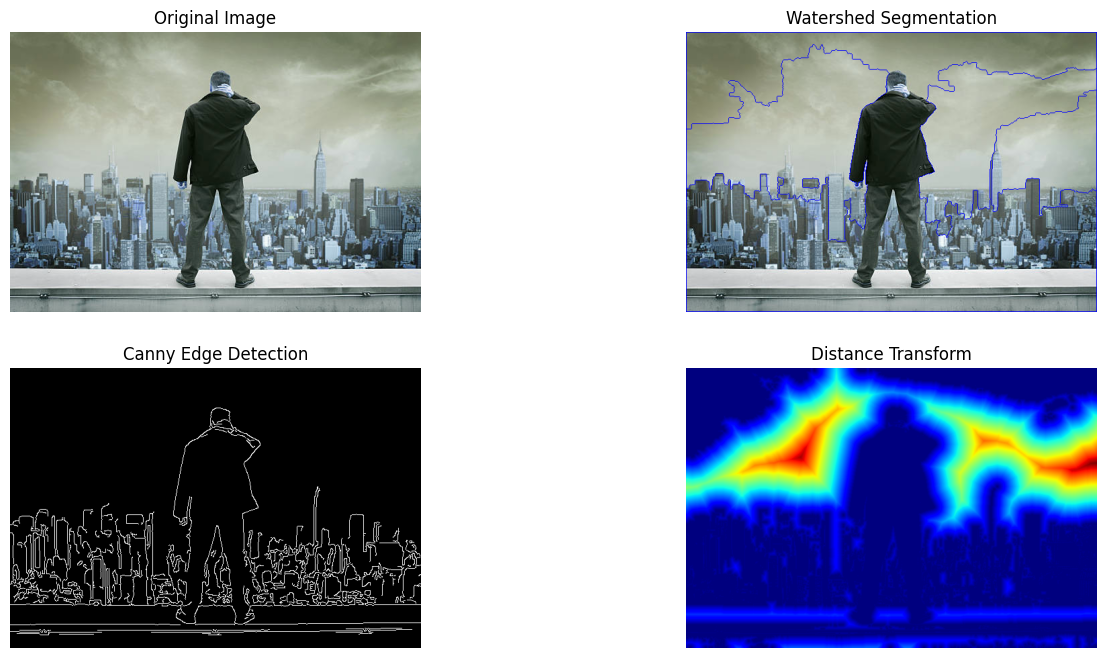

In [ ]:
plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(np.array(image), cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))
plt.title("Watershed Segmentation")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')
plt.subplot(2, 2, 4)
plt.imshow(dist_transform, cmap='jet')
plt.title("Distance Transform")
plt.axis('off')

plt.show()

In [ ]:
test_loss, test_accuracy = metrics_()
test_loss

0.12

In [ ]:
test_accuracy

0.96